<a href="https://colab.research.google.com/github/osamaaqeel/INSE-6220-Project/blob/main/Copy_of_osama6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Data loading
df=pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
# Data understanding
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [ ]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)
dfcat=df.select_dtypes(exclude='number')
dfcat.head()

,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
0,Female,no,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
1,Female,Sometimes,no,yes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,Frequently,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
3,Male,Frequently,no,no,no,no,Sometimes,Walking,Overweight_Level_I
4,Male,Sometimes,no,no,no,no,Sometimes,Public_Transportation,Overweight_Level_II


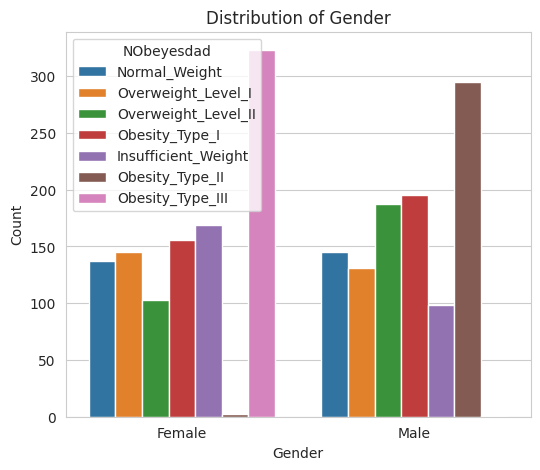

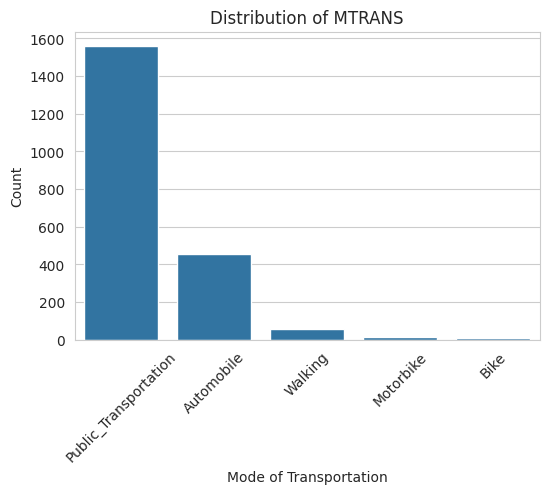

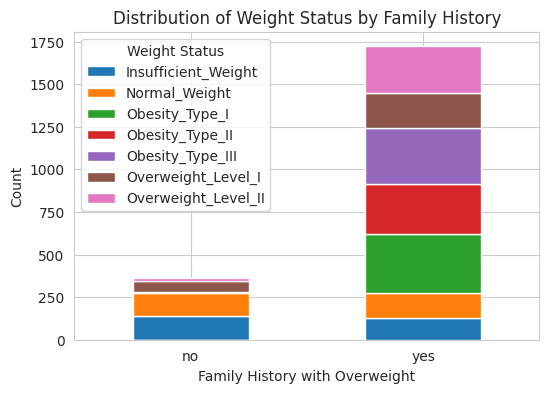

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plot 1: Bar chart for Gender
plt.figure(figsize=(6,5))
sns.countplot(data=dfcat, x="Gender",hue='NObeyesdad')
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Plot 2: Count plot for MTRANS
plt.figure(figsize=(6, 4))
sns.countplot(data=dfcat, x="MTRANS", order=df['MTRANS'].value_counts().index)
plt.title("Distribution of MTRANS")
plt.xlabel("Mode of Transportation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 3: Stacked bar chart for family_history_with_overweight and NObeyesdad
cross_tab = pd.crosstab(dfcat["family_history_with_overweight"], df["NObeyesdad"])
cross_tab.plot(kind="bar", stacked=True, figsize=(6, 4))
plt.title("Distribution of Weight Status by Family History")
plt.xlabel("Family History with Overweight")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Weight Status")
plt.show()

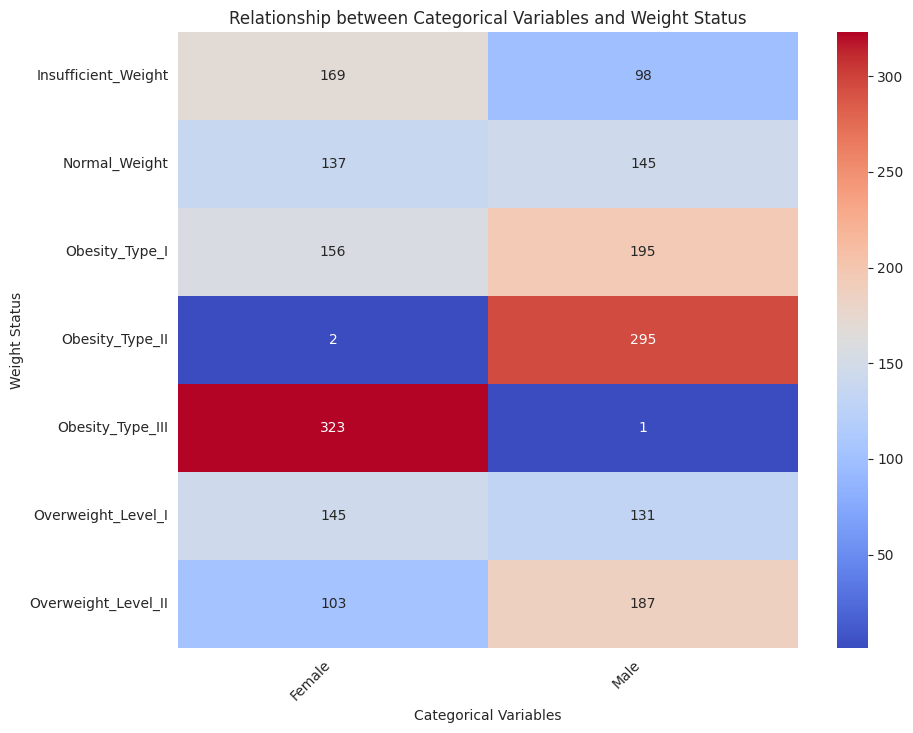

In [ ]:
# Plot 2: Heatmap showing the relationship between all categorical variables and NObeyesdad
plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(dfcat["NObeyesdad"], [dfcat["Gender"]]),cmap="coolwarm", annot=True, fmt="d") #  dfcat["CALC"], dfcat["FAVC"], dfcat["SCC"], dfcat["SMOKE"], dfcat["family_history_with_overweight"], dfcat["CAEC"], dfcat["MTRANS"]]), cmap="coolwarm", annot=True, fmt="d")
plt.title("Relationship between Categorical Variables and Weight Status")
plt.xlabel("Categorical Variables")
plt.ylabel("Weight Status")
plt.xticks(rotation=45, ha='right')
plt.show()

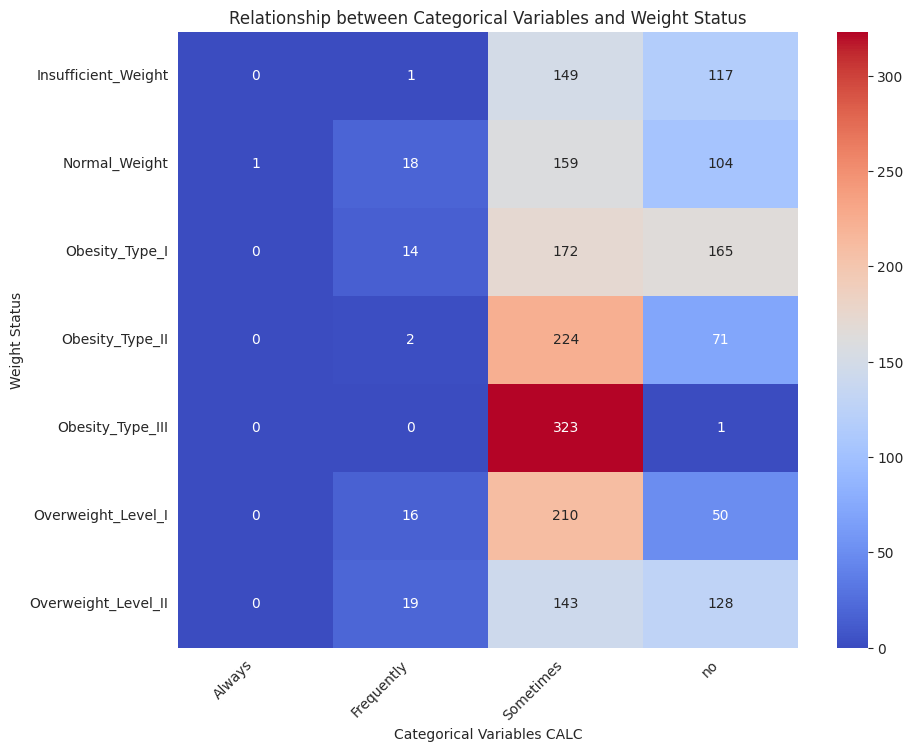

In [ ]:
# Plot 2: Heatmap showing the relationship between all categorical variables and NObeyesdad
plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(dfcat["NObeyesdad"], [dfcat["CALC"]]),cmap="coolwarm", annot=True, fmt="d") #  , dfcat["FAVC"], dfcat["SCC"], dfcat["SMOKE"], dfcat["family_history_with_overweight"], dfcat["CAEC"], dfcat["MTRANS"]]), cmap="coolwarm", annot=True, fmt="d")
plt.title("Relationship between Categorical Variables and Weight Status")
plt.xlabel("Categorical Variables CALC")
plt.ylabel("Weight Status")
plt.xticks(rotation=45, ha='right')
plt.show()

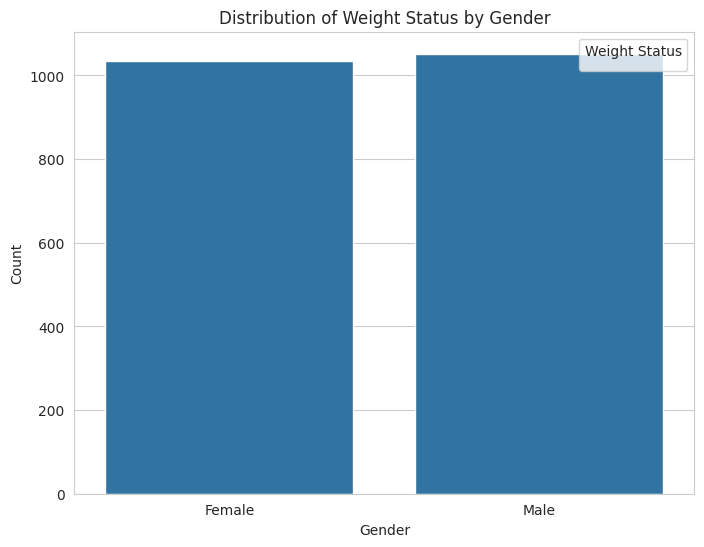

In [ ]:
sns.set_style("whitegrid")

# Plot 1: Bar plot showing the relationship between Gender and NObeyesdad
plt.figure(figsize=(8, 6))
sns.countplot(data=dfcat, x="Gender")
plt.title("Distribution of Weight Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Weight Status")
plt.show()

In [ ]:
dfcat.columns

Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

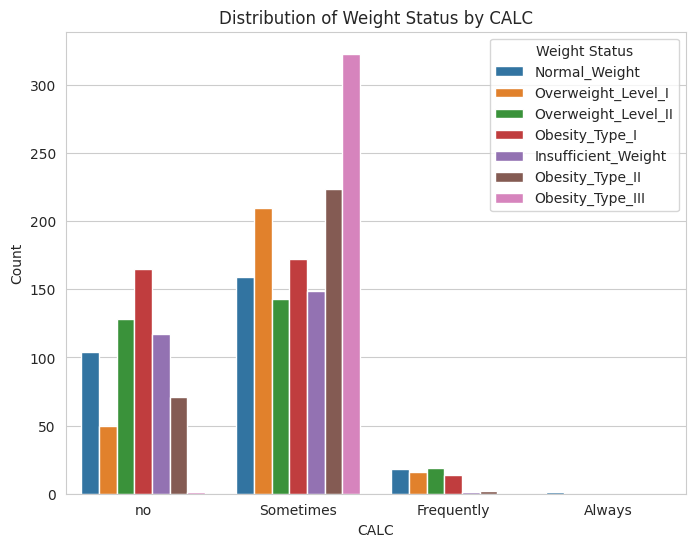

In [ ]:
sns.set_style("whitegrid")

# Plot 1: Bar plot showing the relationship between Gender and NObeyesdad
plt.figure(figsize=(8, 6))
sns.countplot(data=dfcat, x="CALC", hue="NObeyesdad")
plt.title("Distribution of Weight Status by CALC")
plt.xlabel("CALC")
plt.ylabel("Count")
plt.legend(title="Weight Status")
plt.show()

In [ ]:
dfnum=df.select_dtypes(exclude='object')
dfnum.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


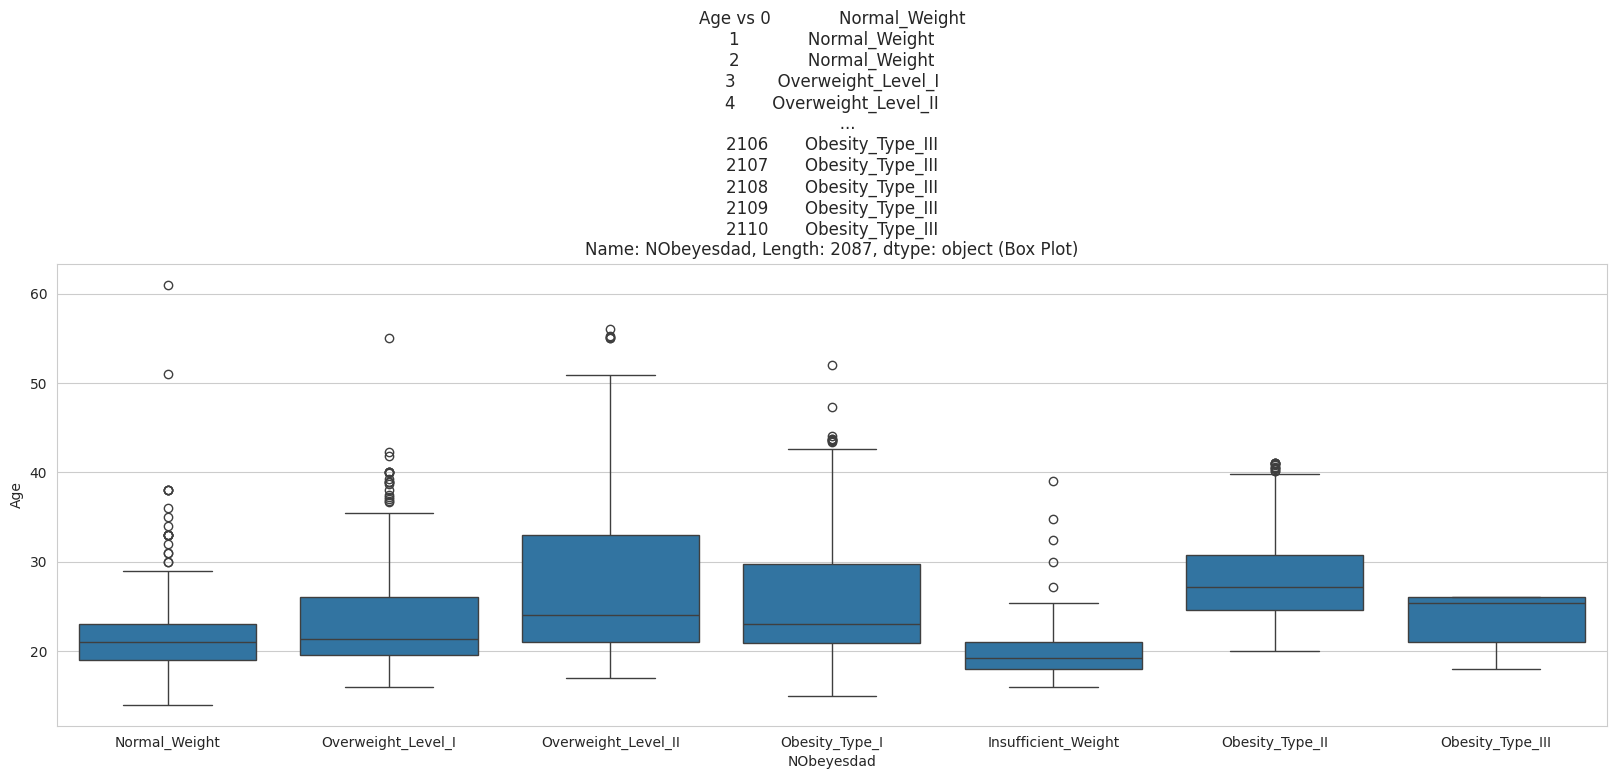

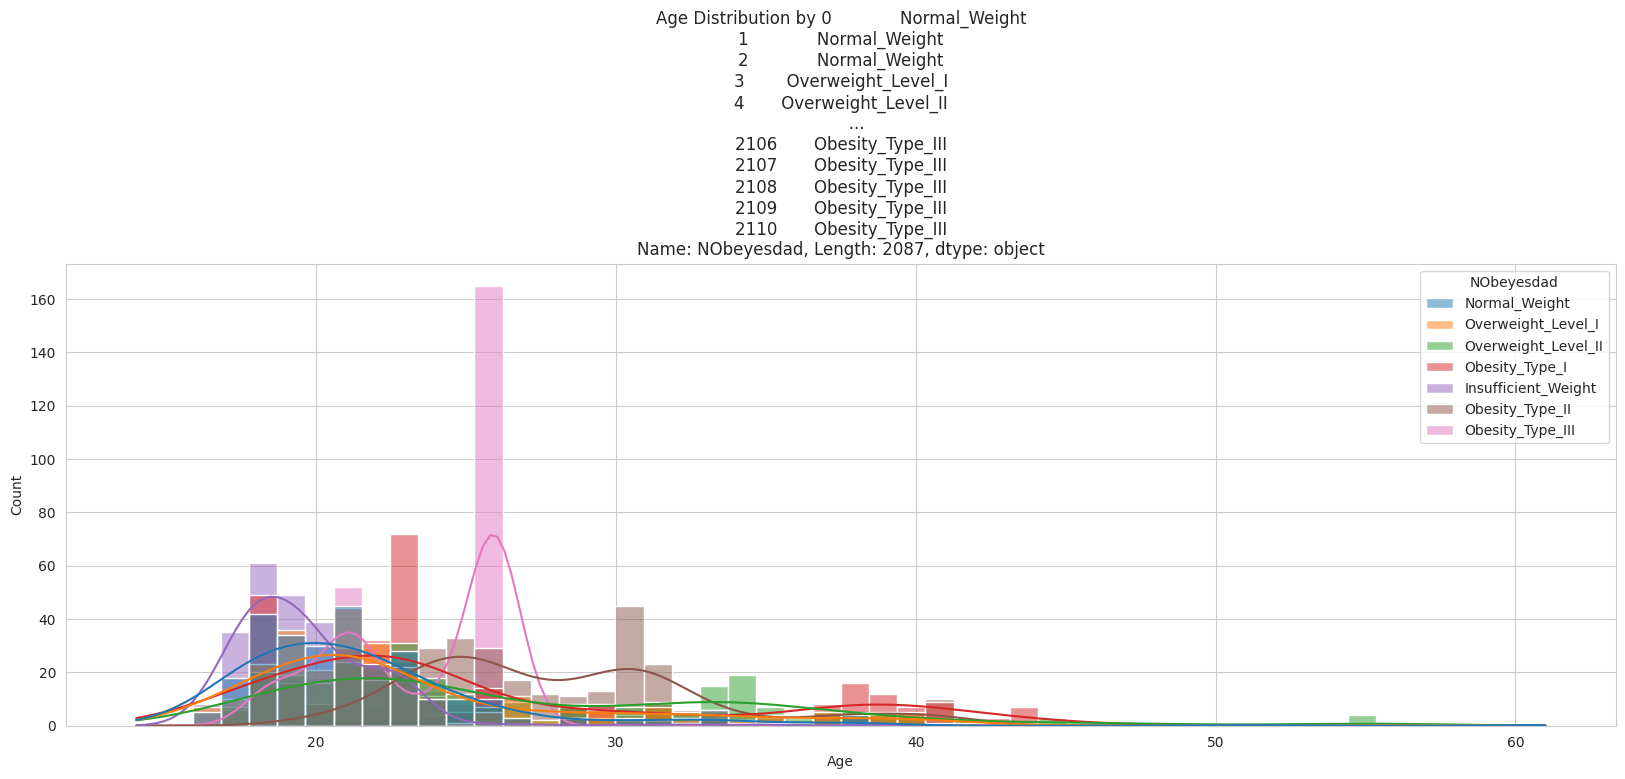

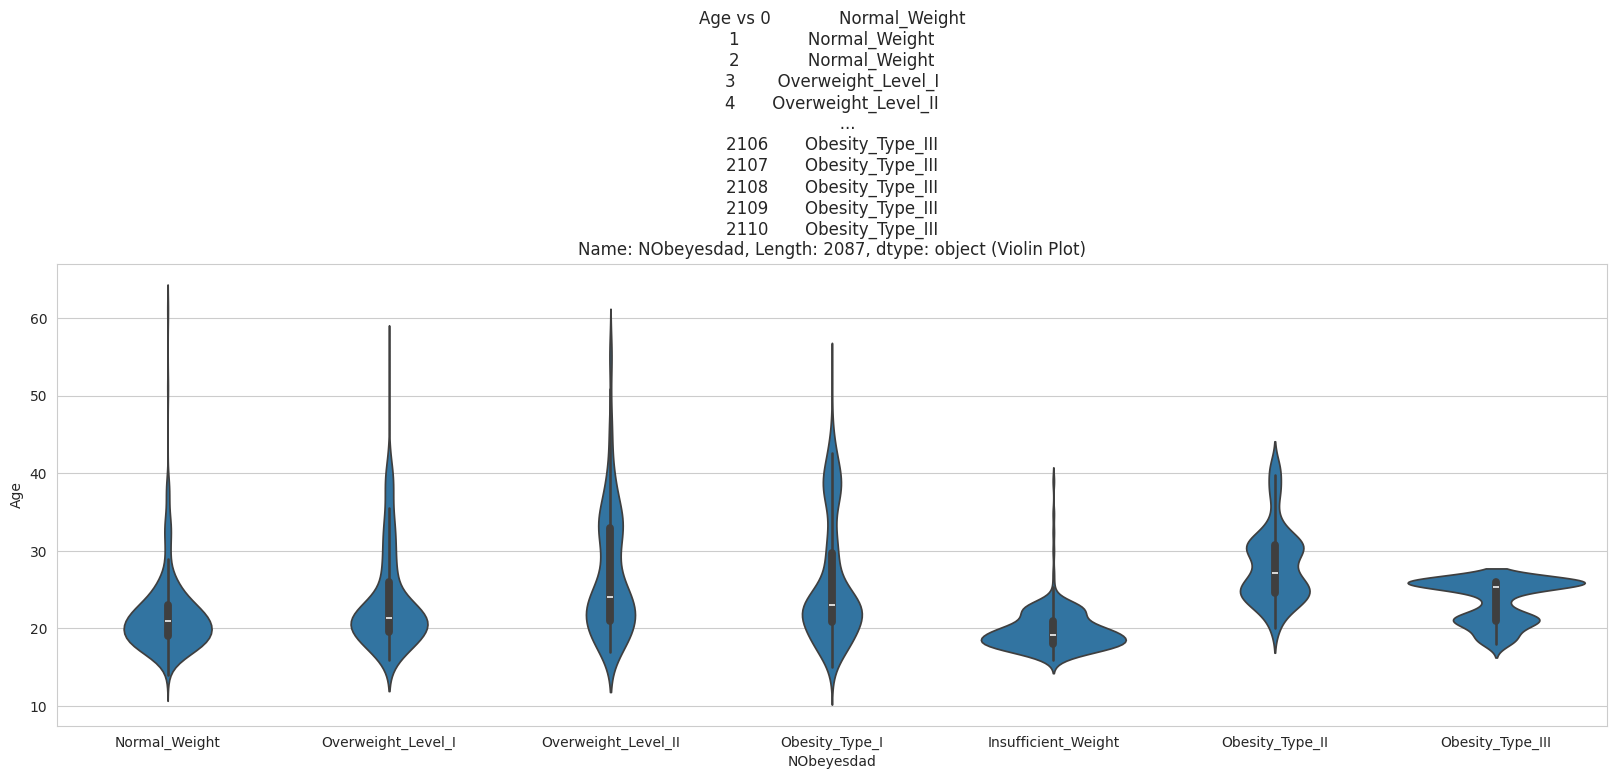

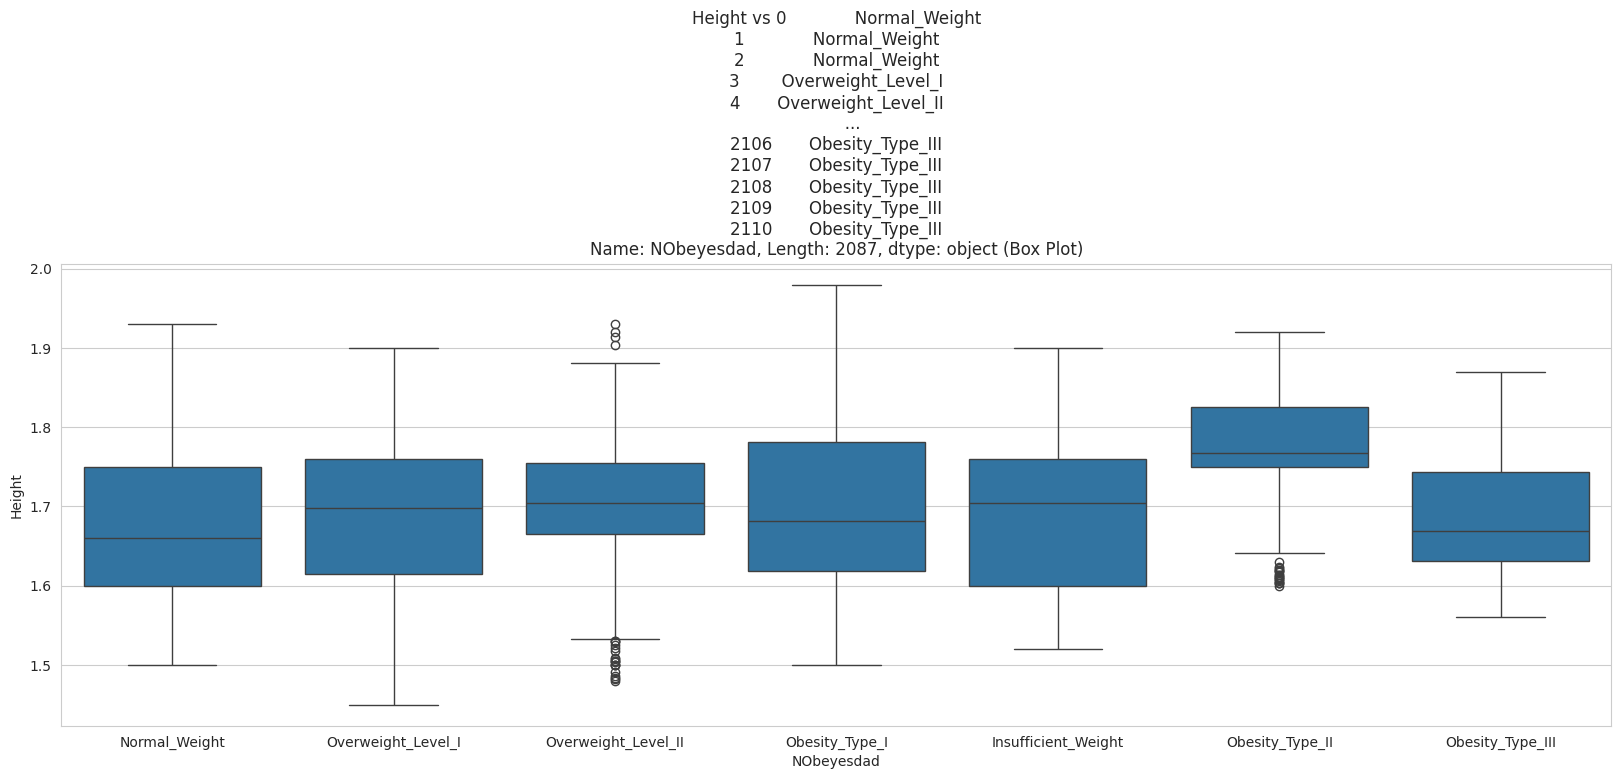

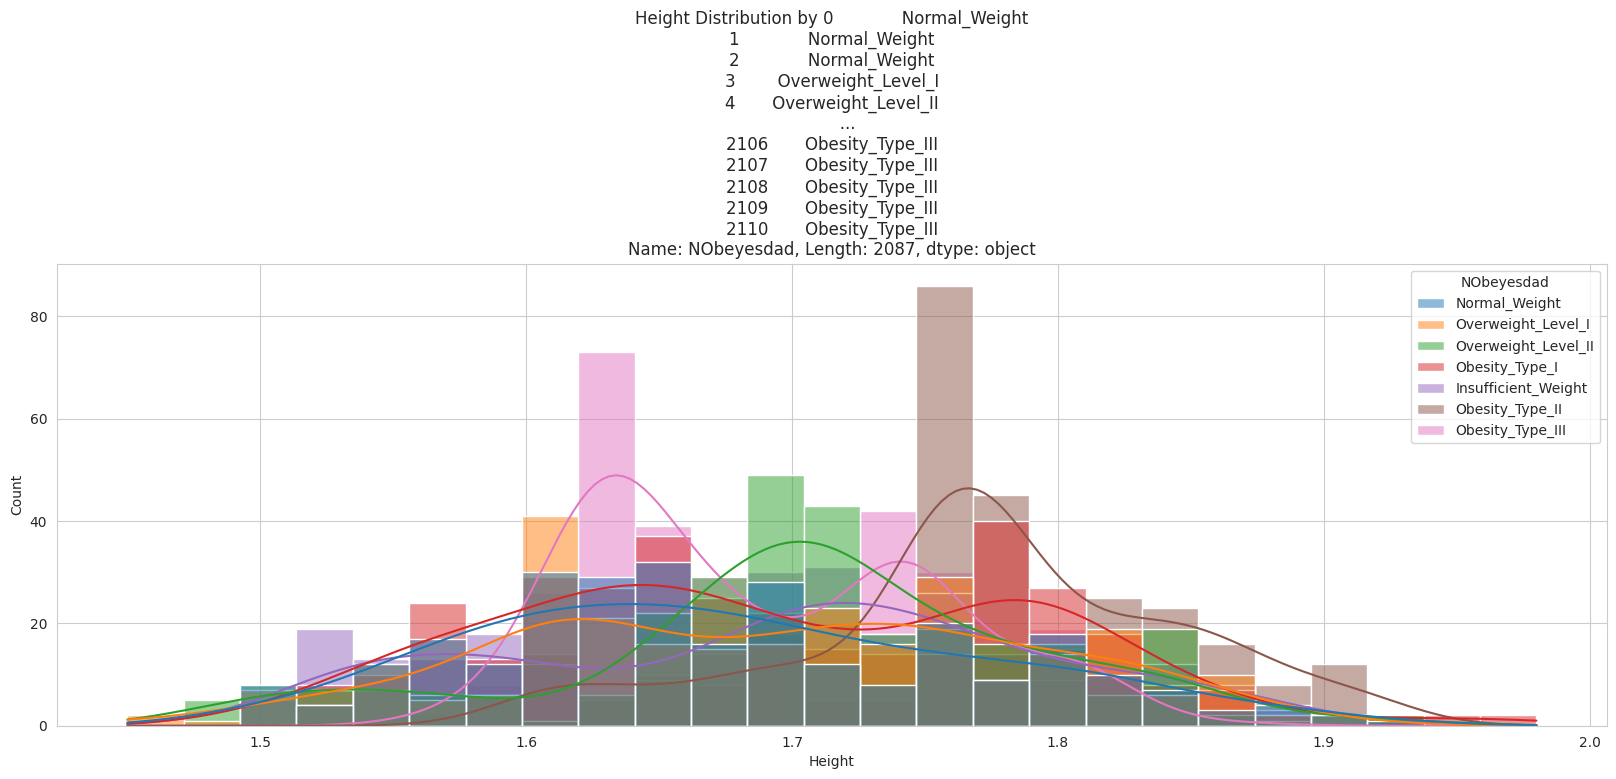

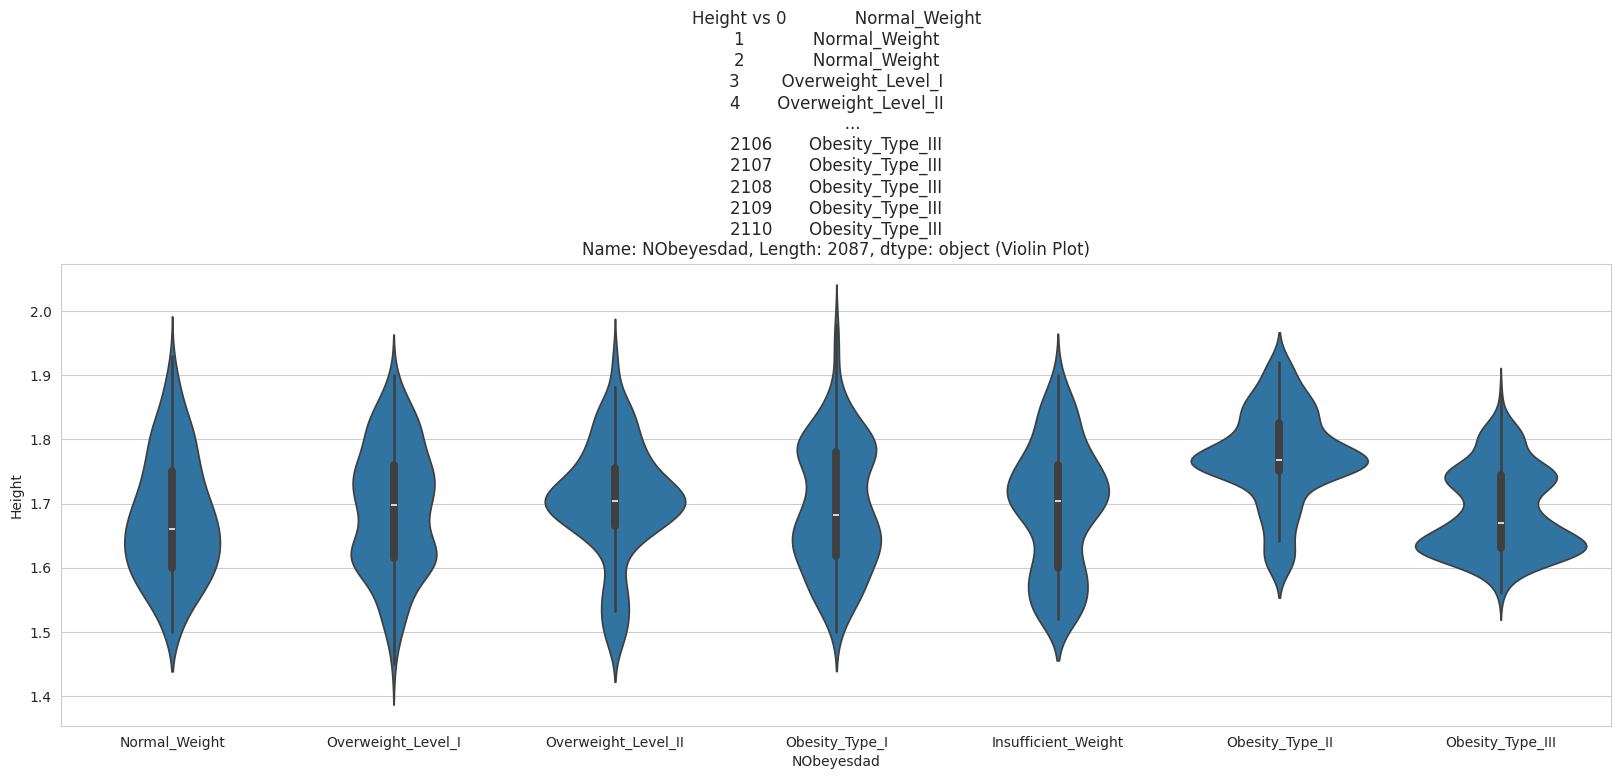

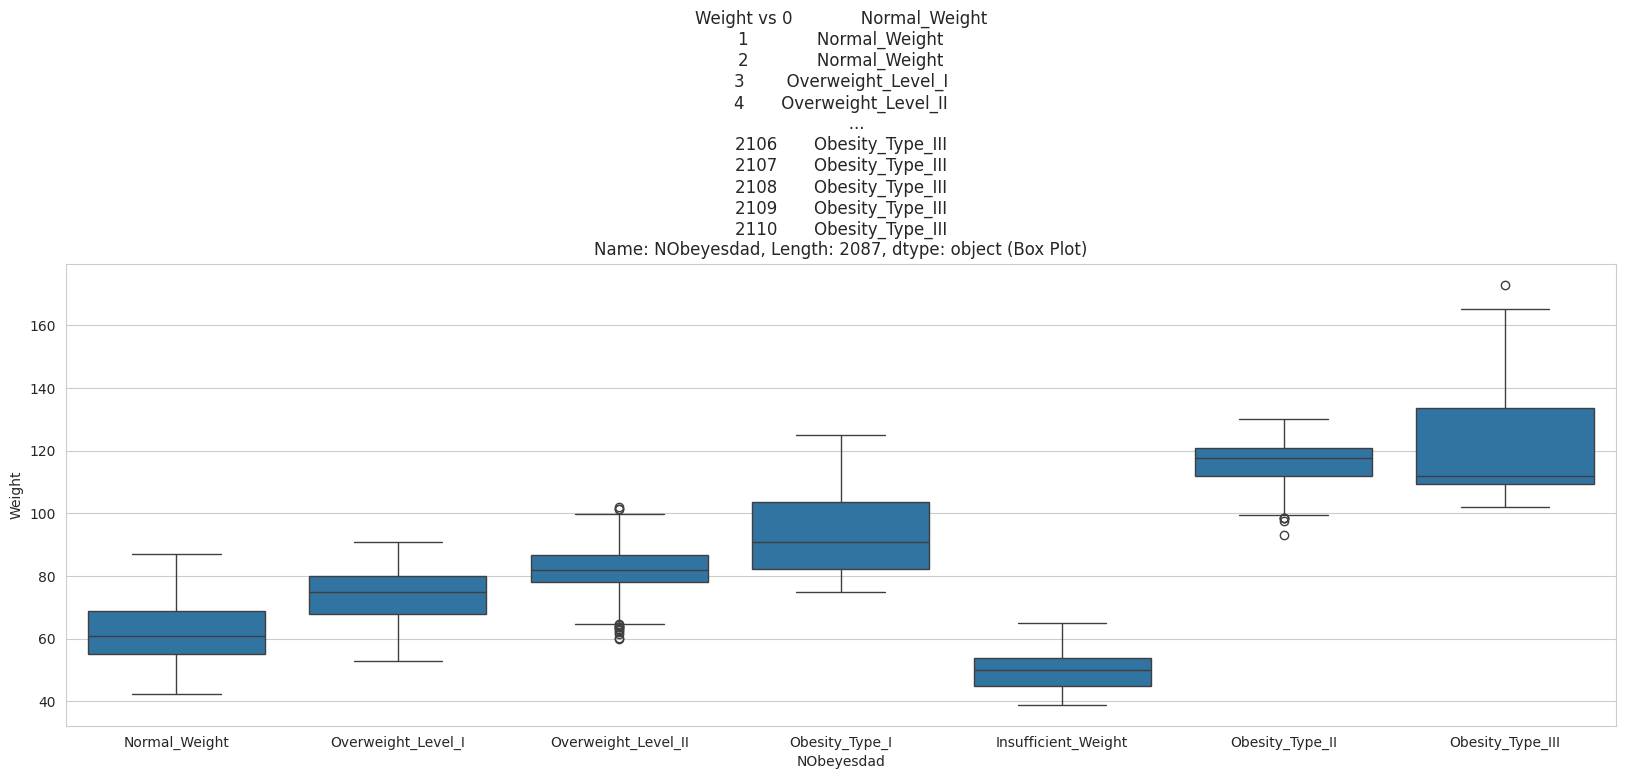

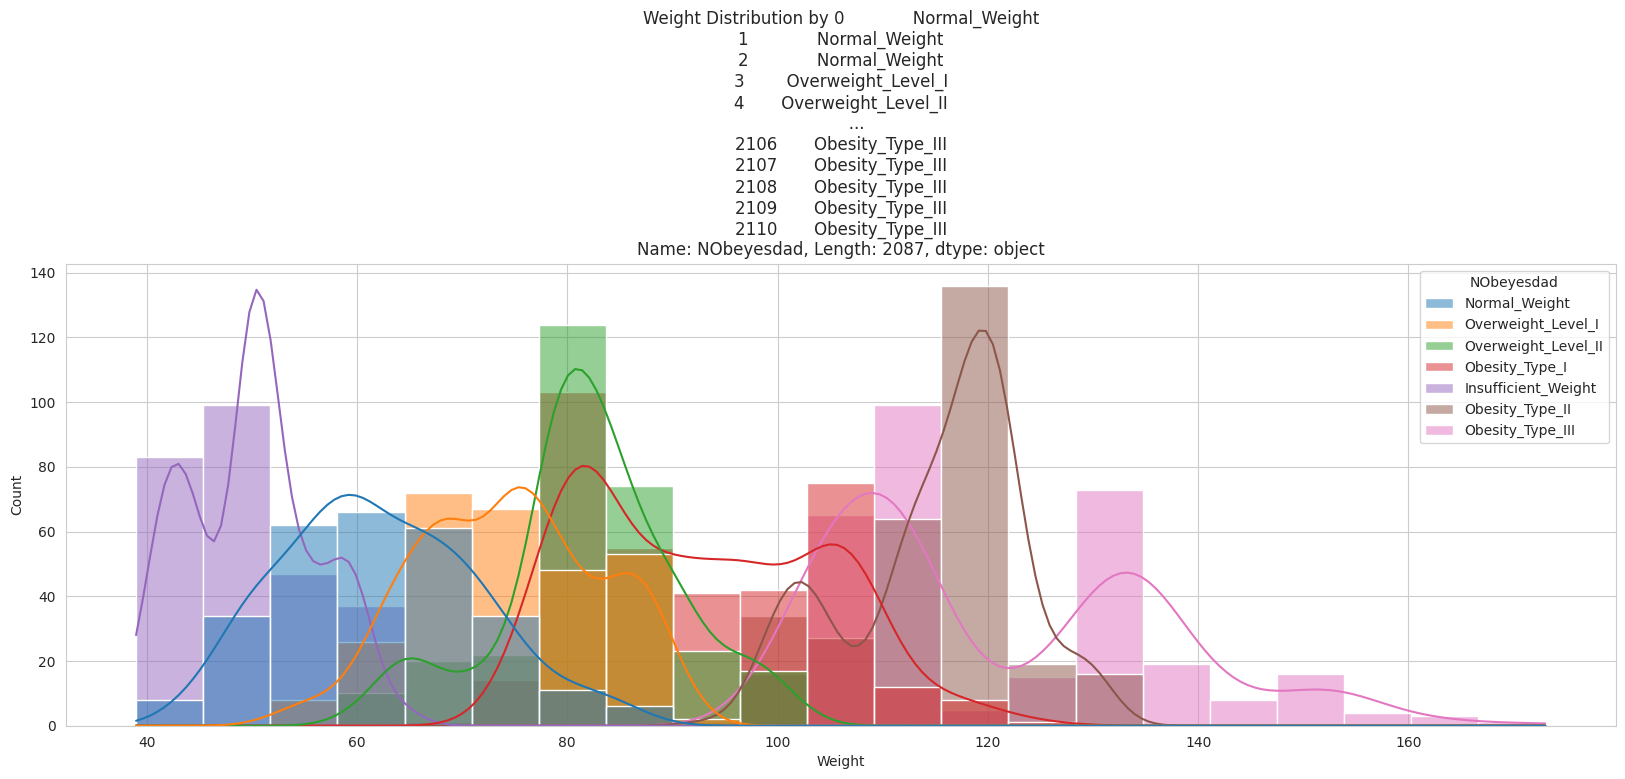

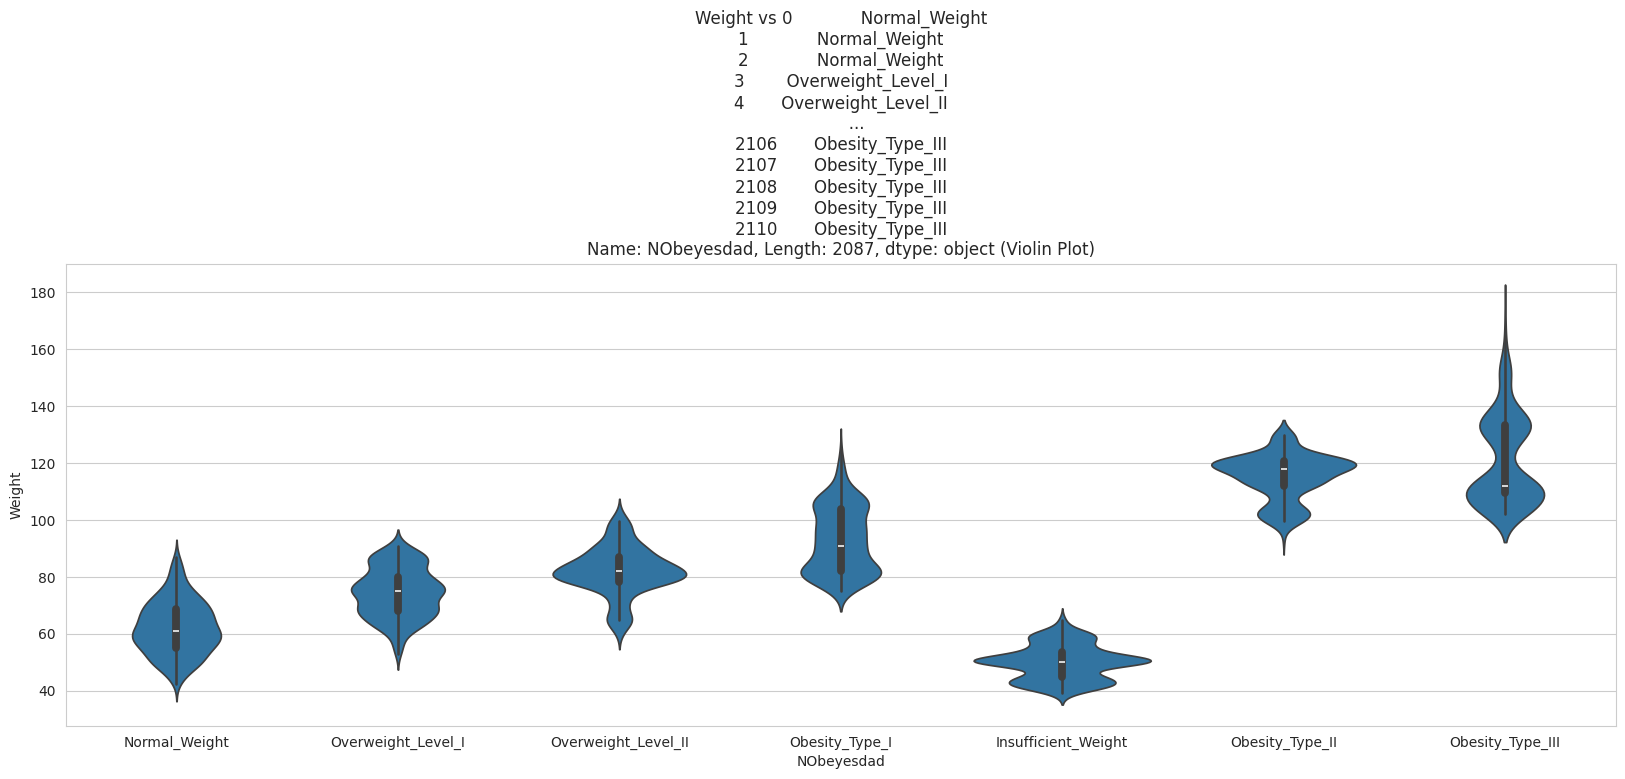

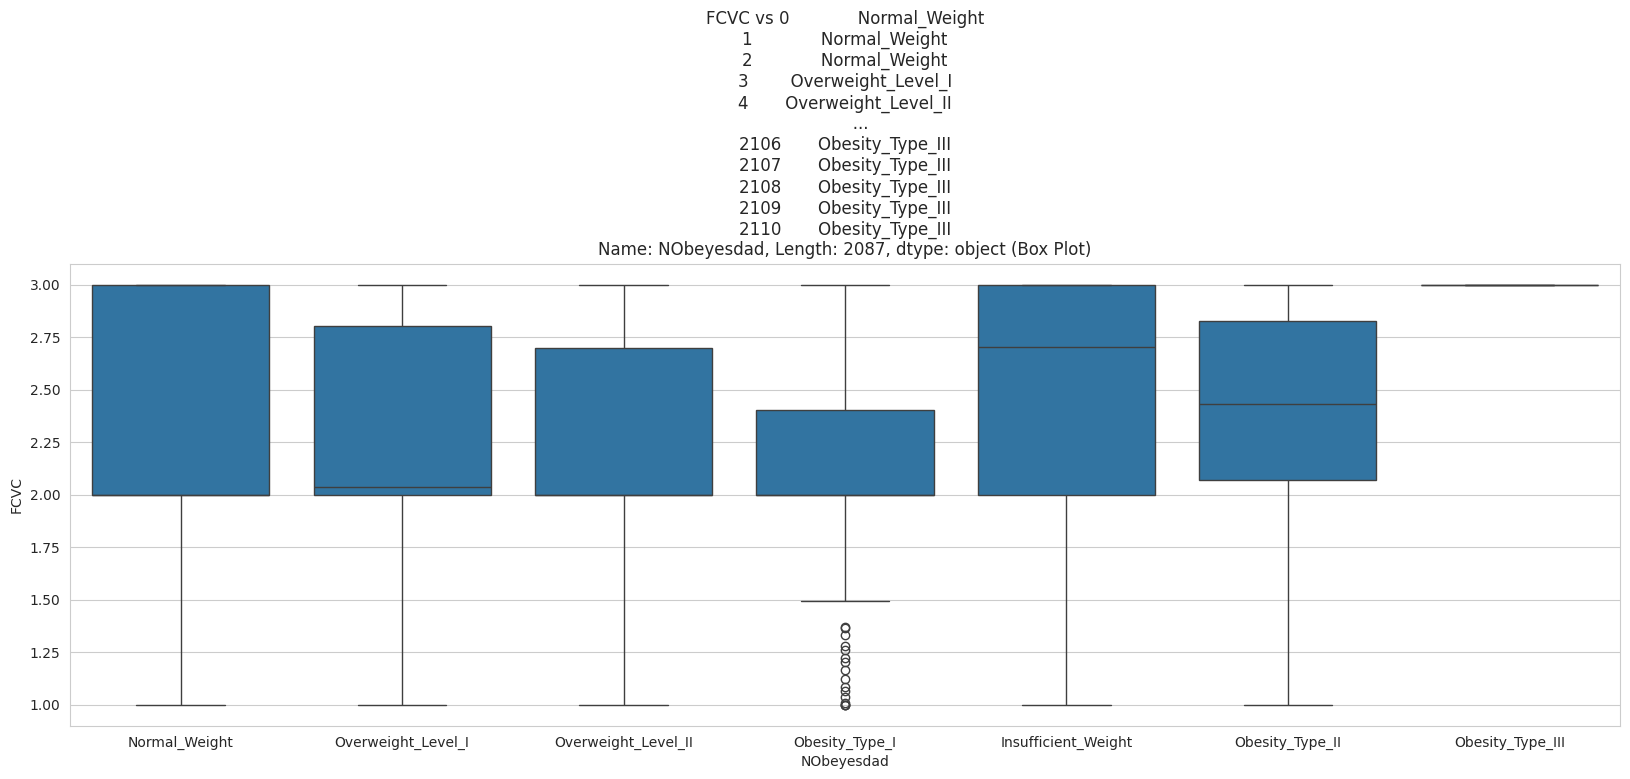

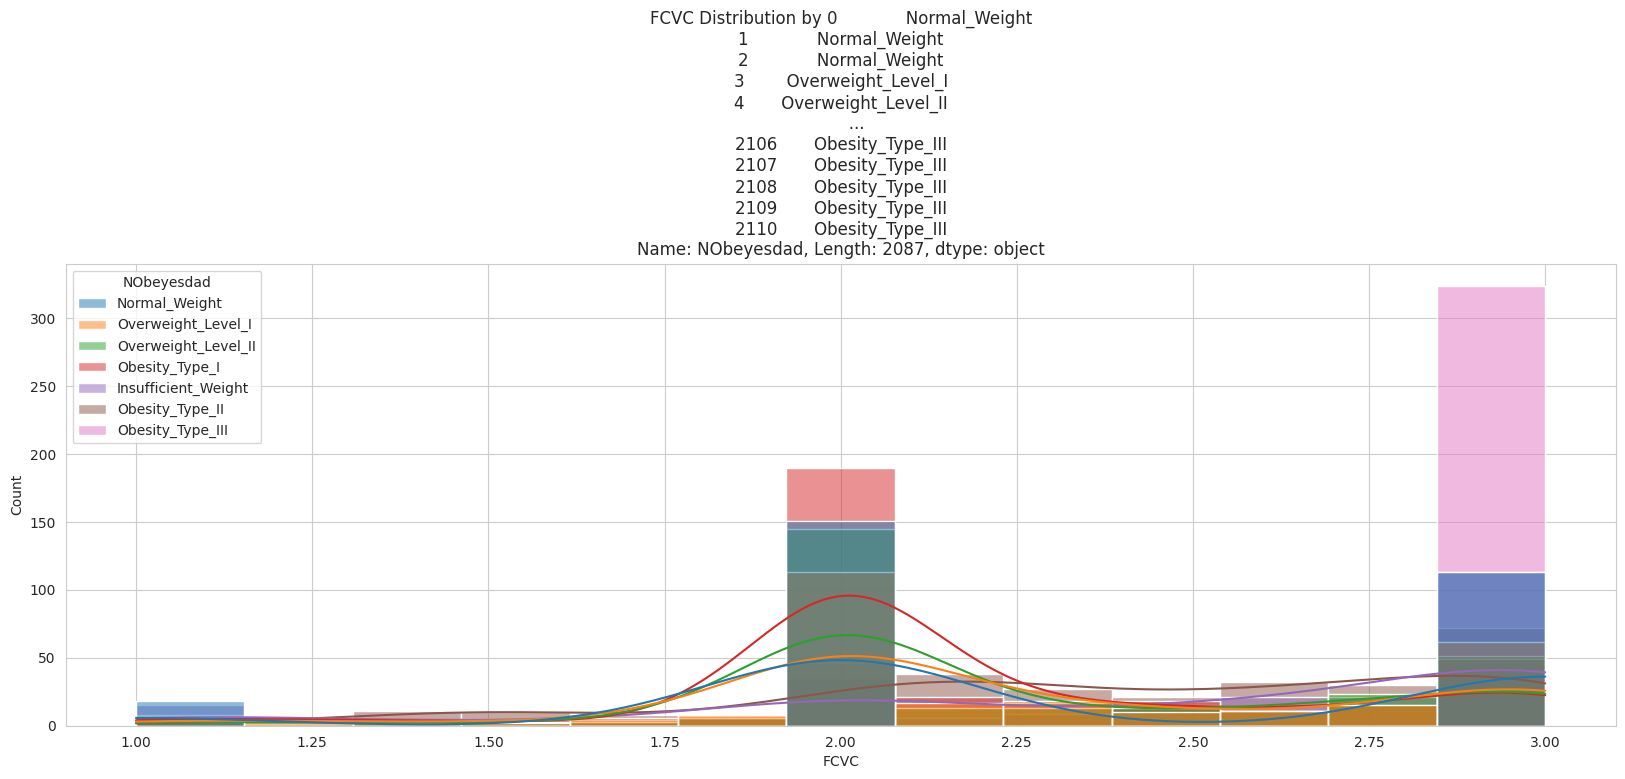

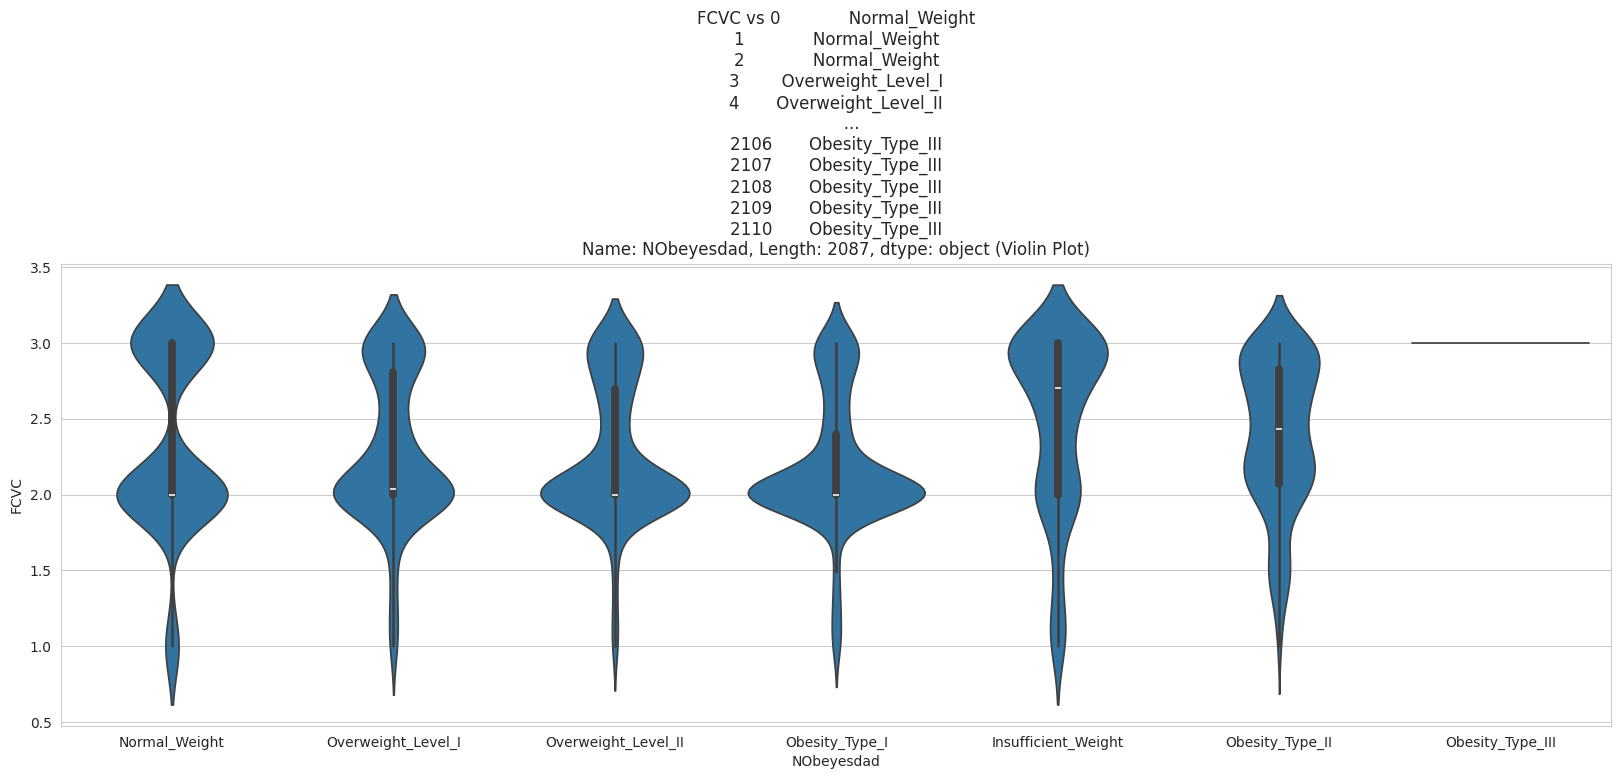

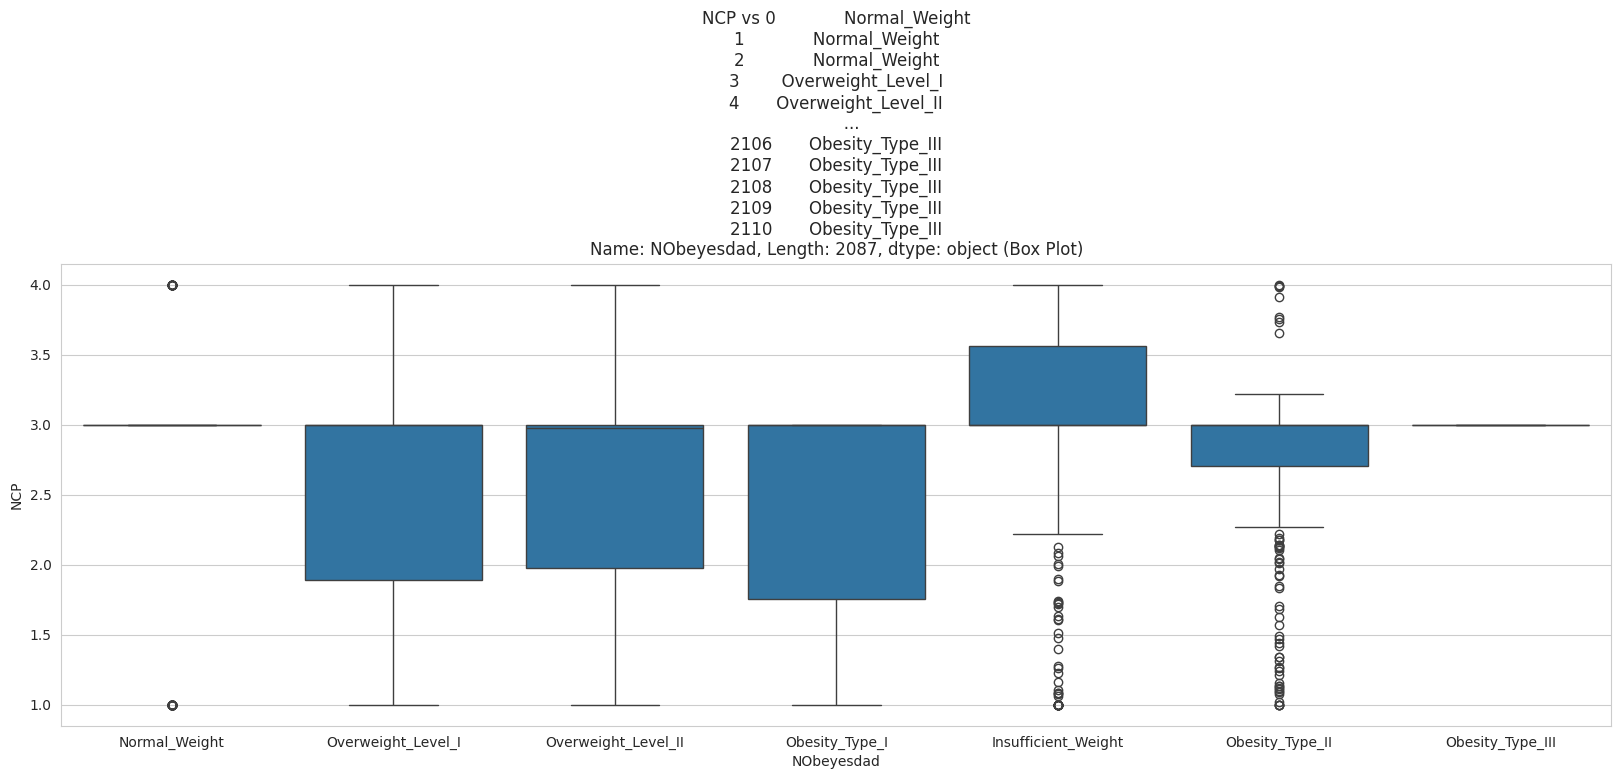

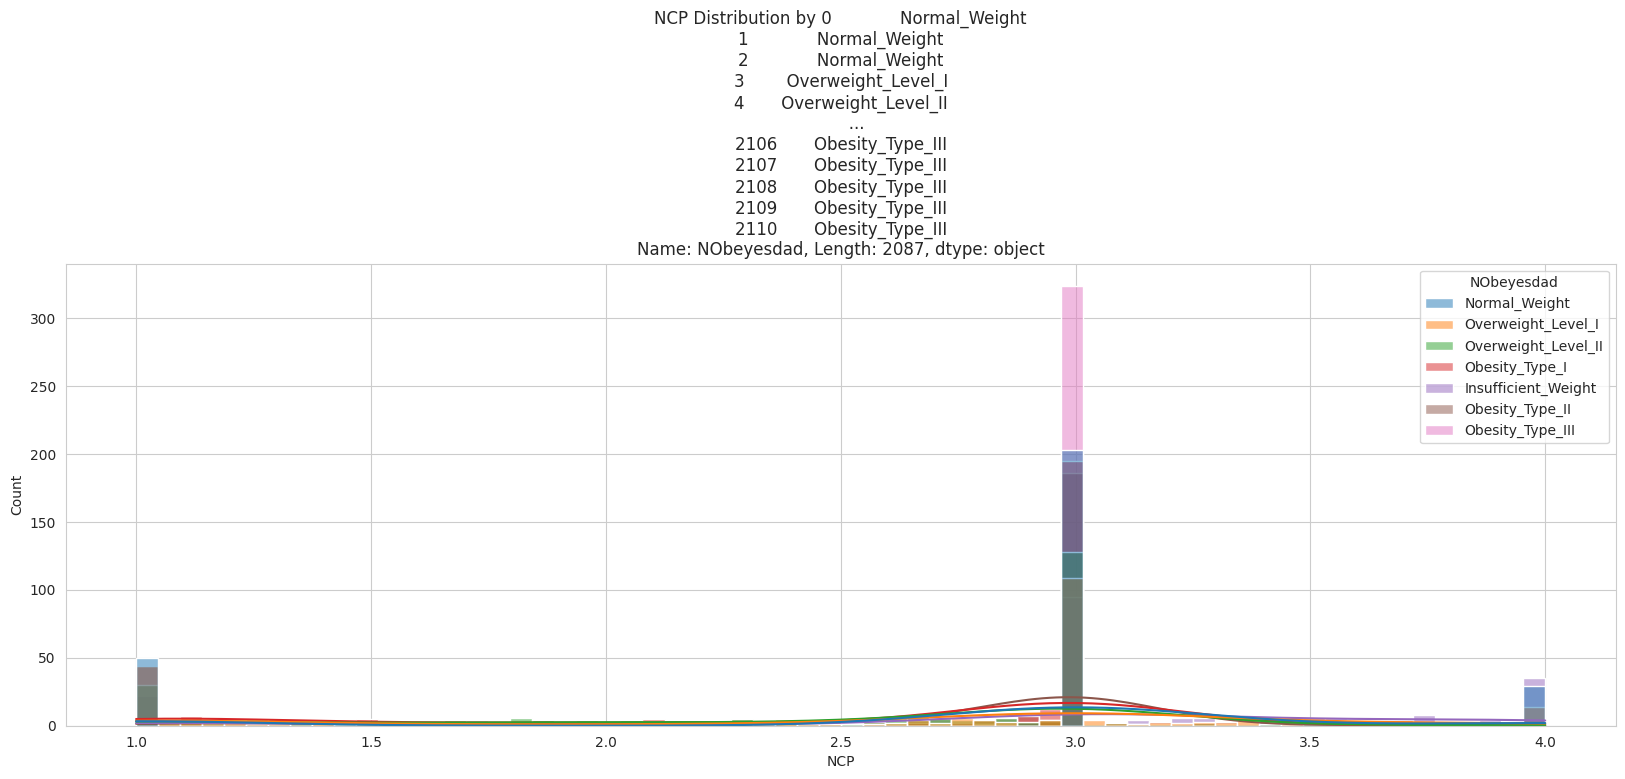

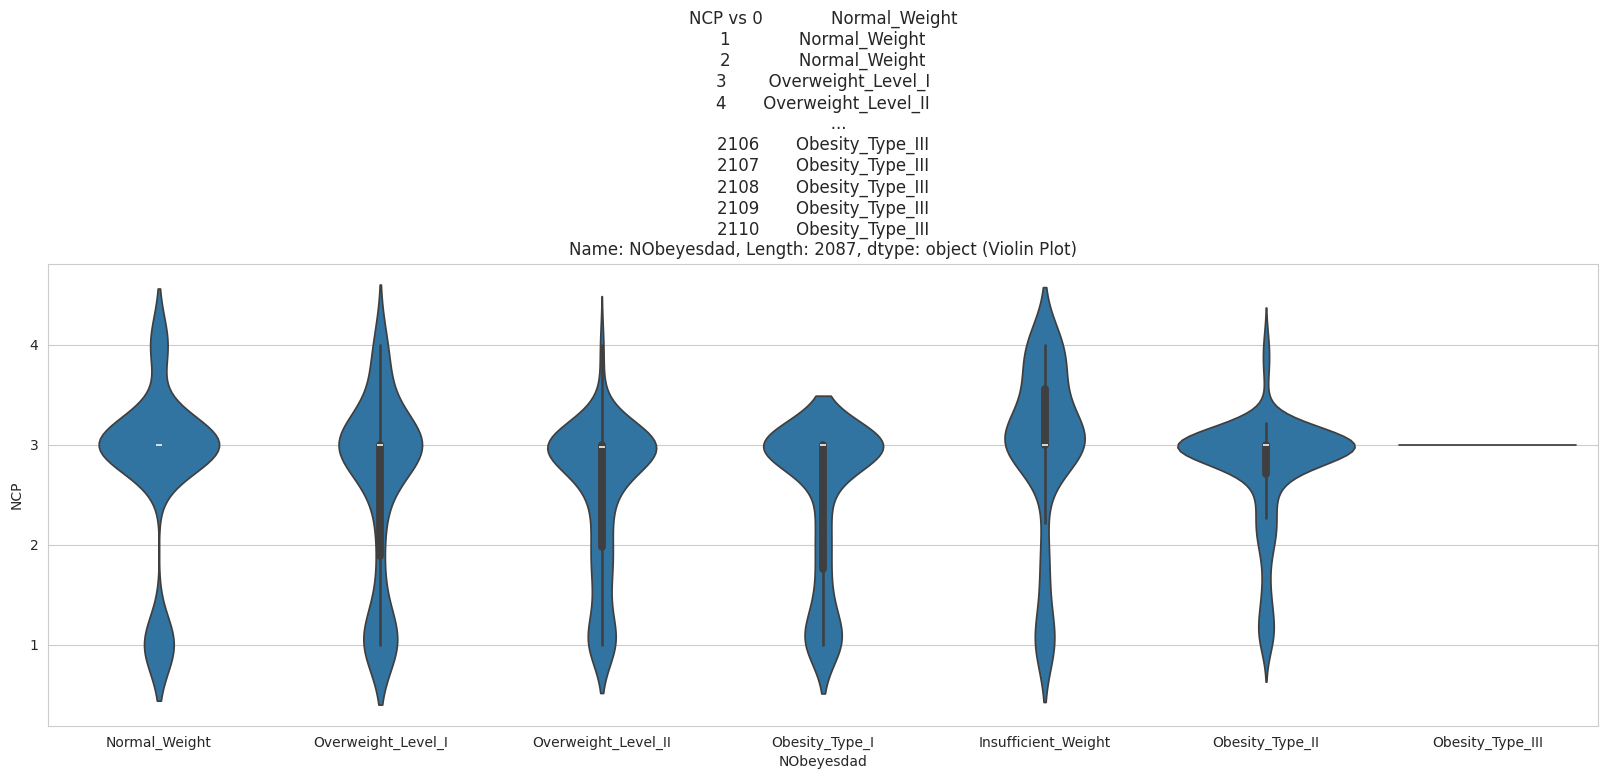

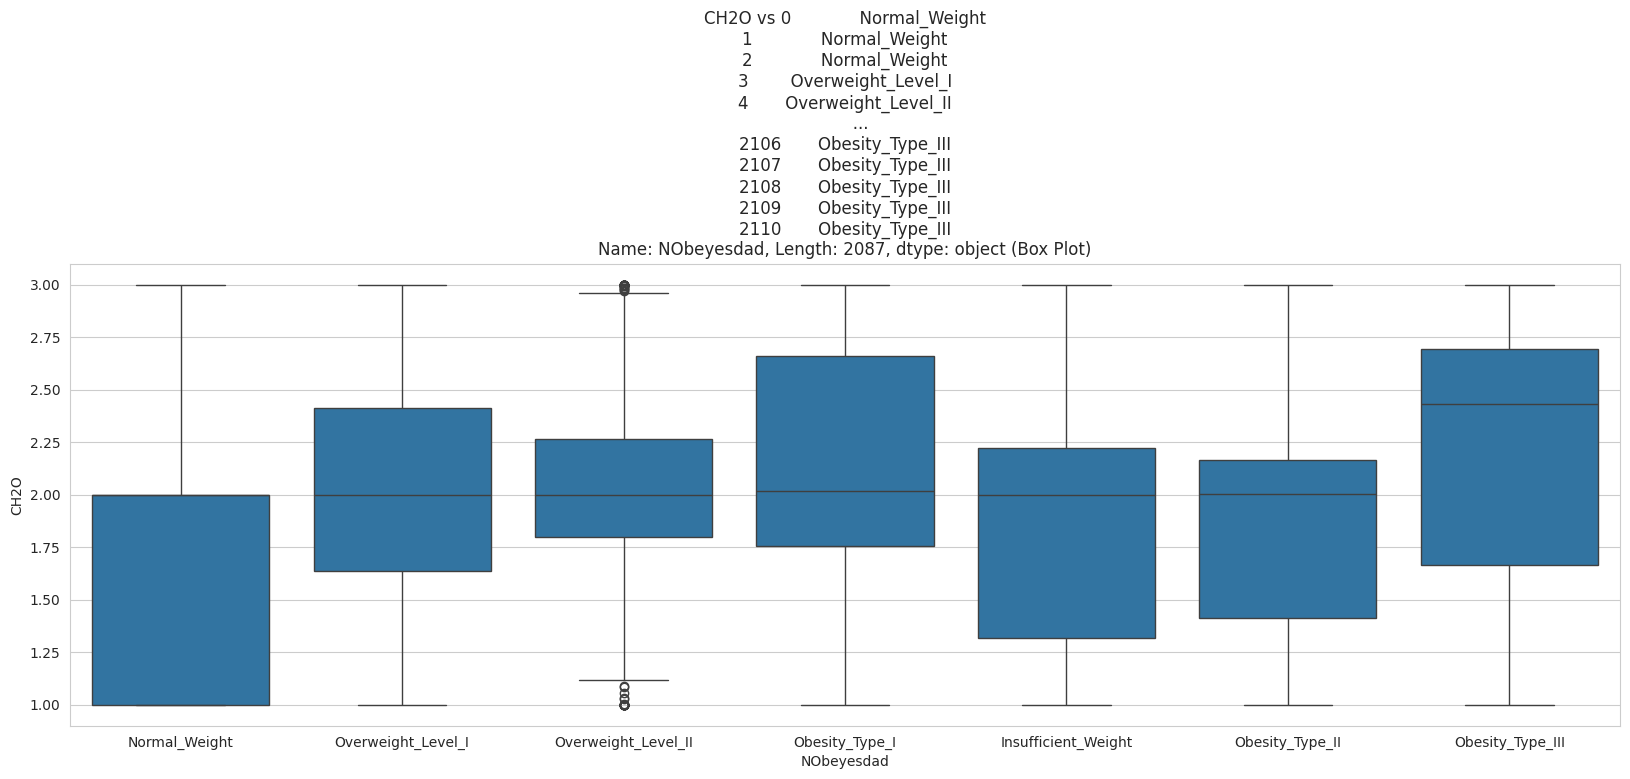

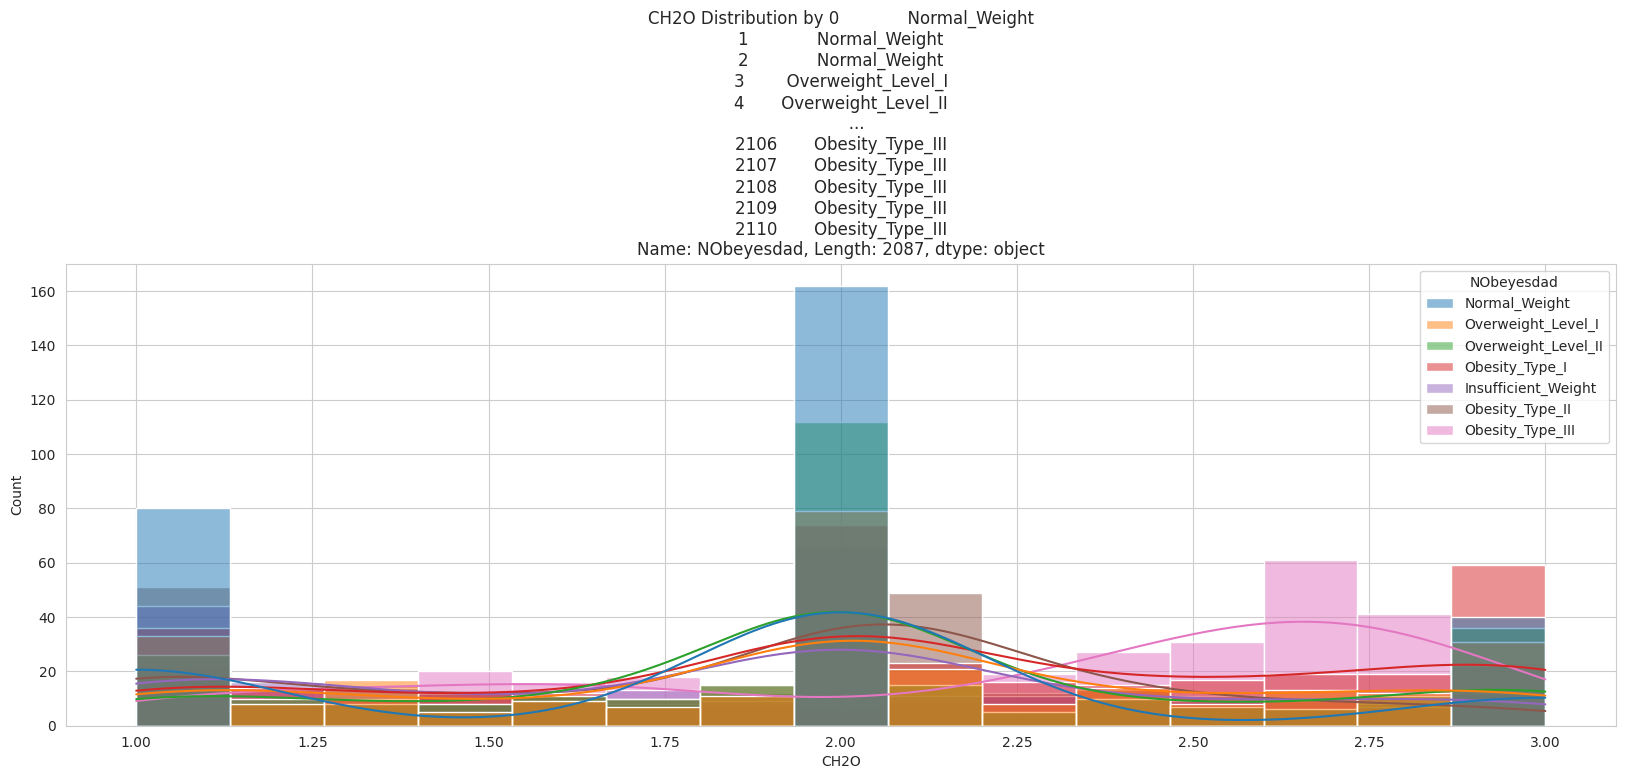

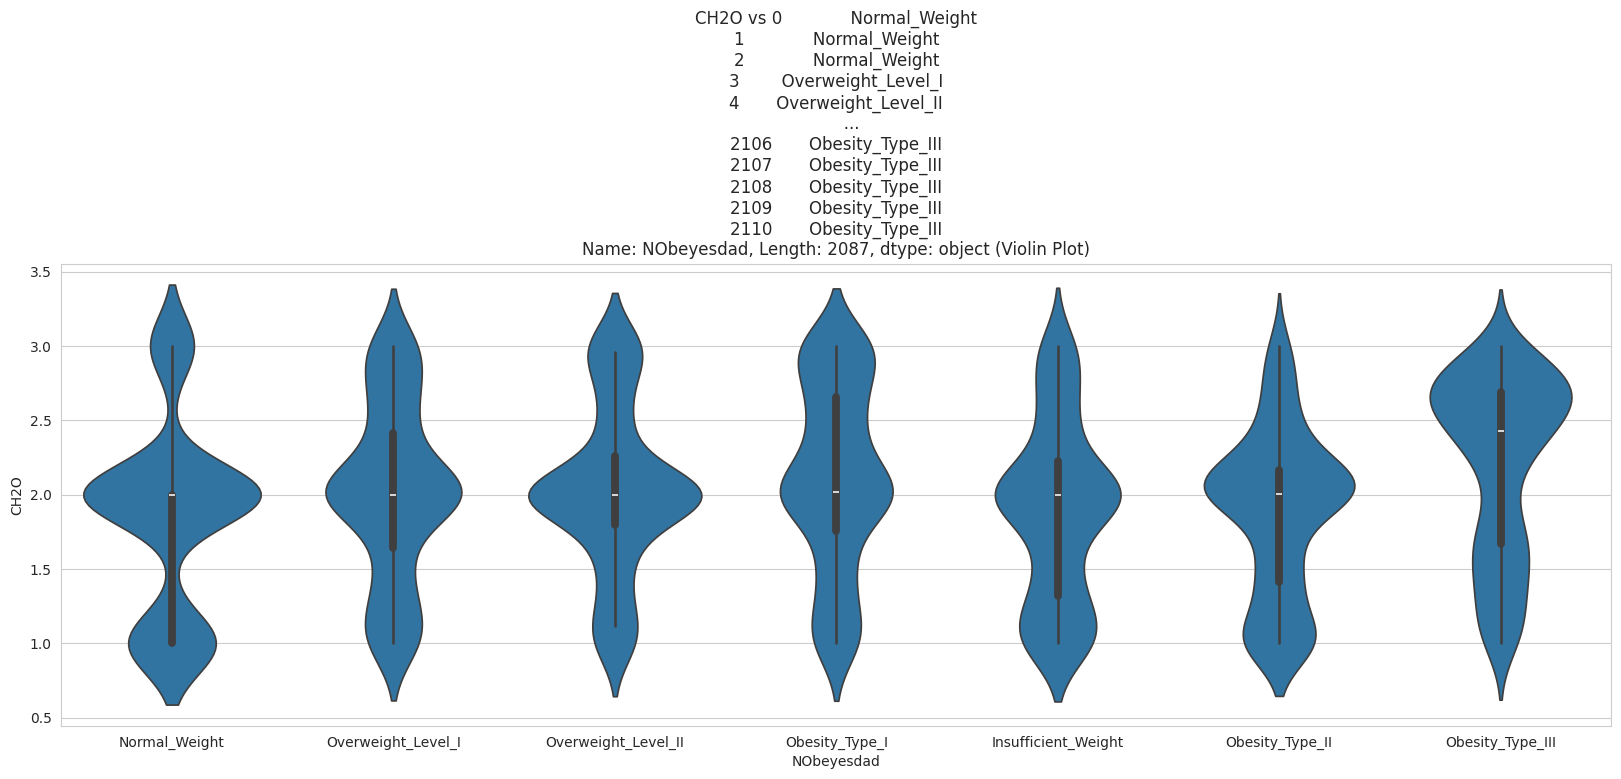

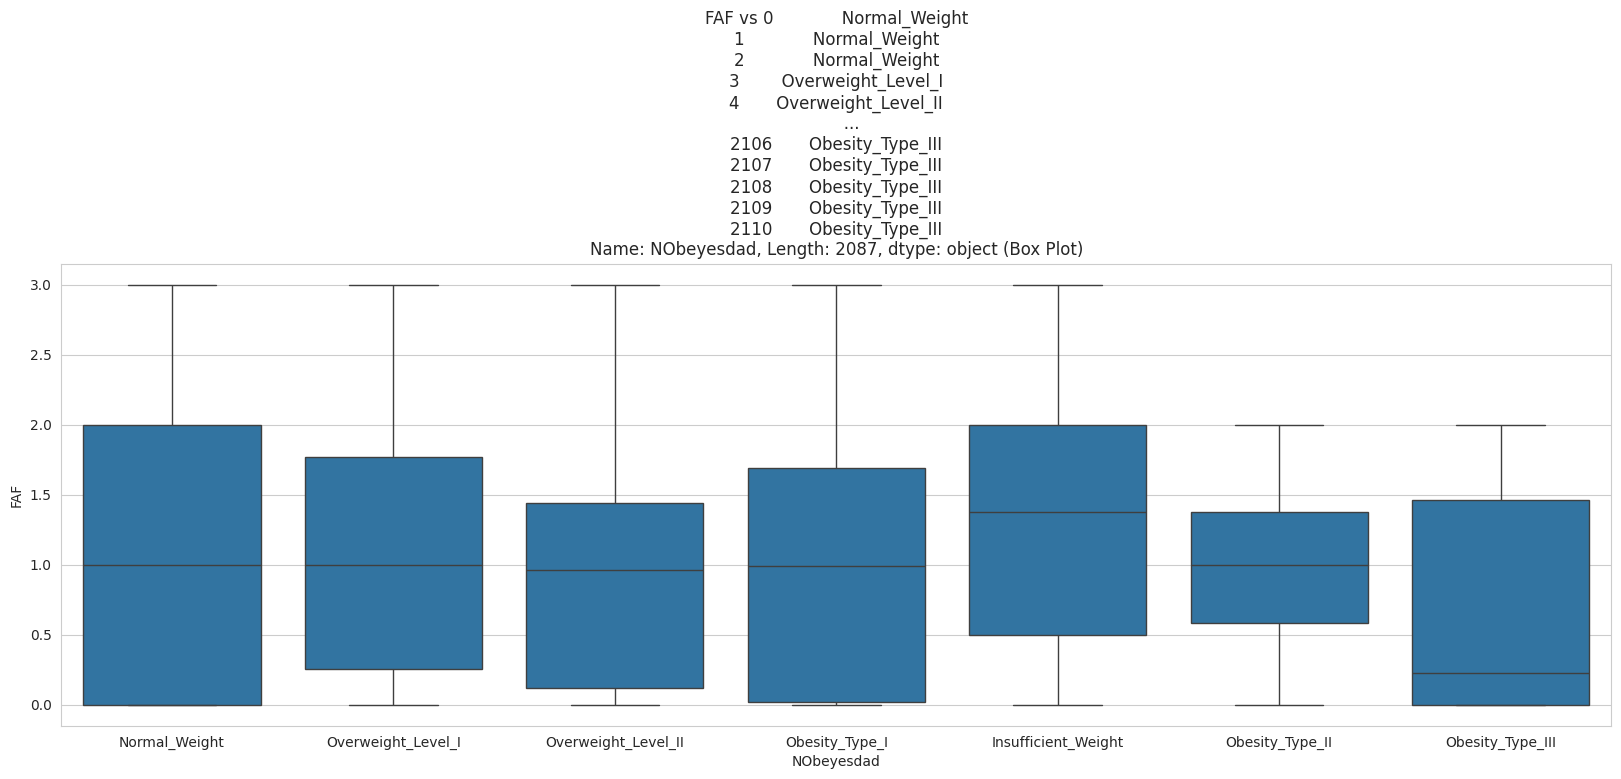

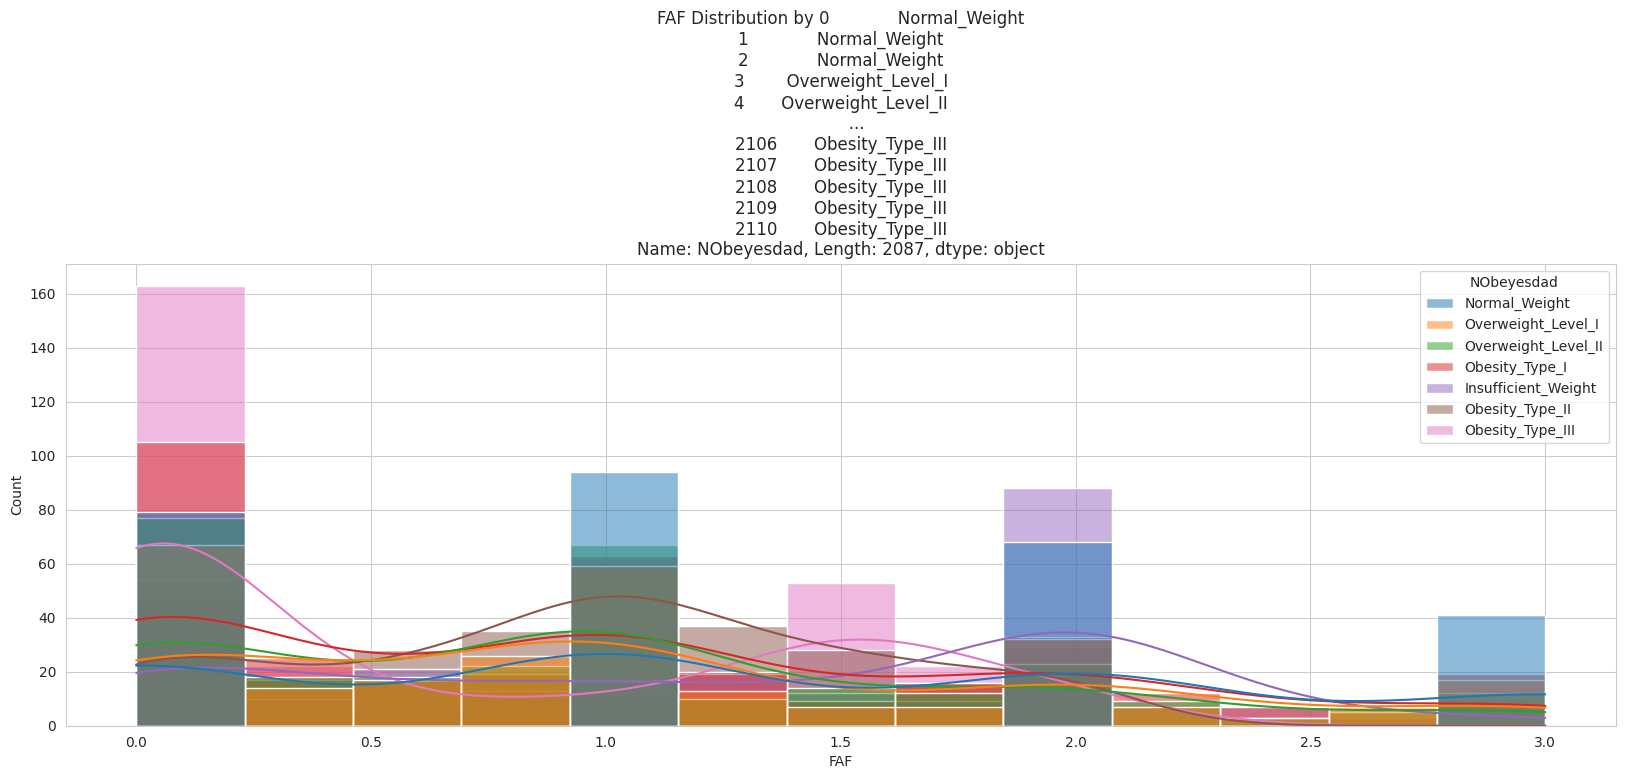

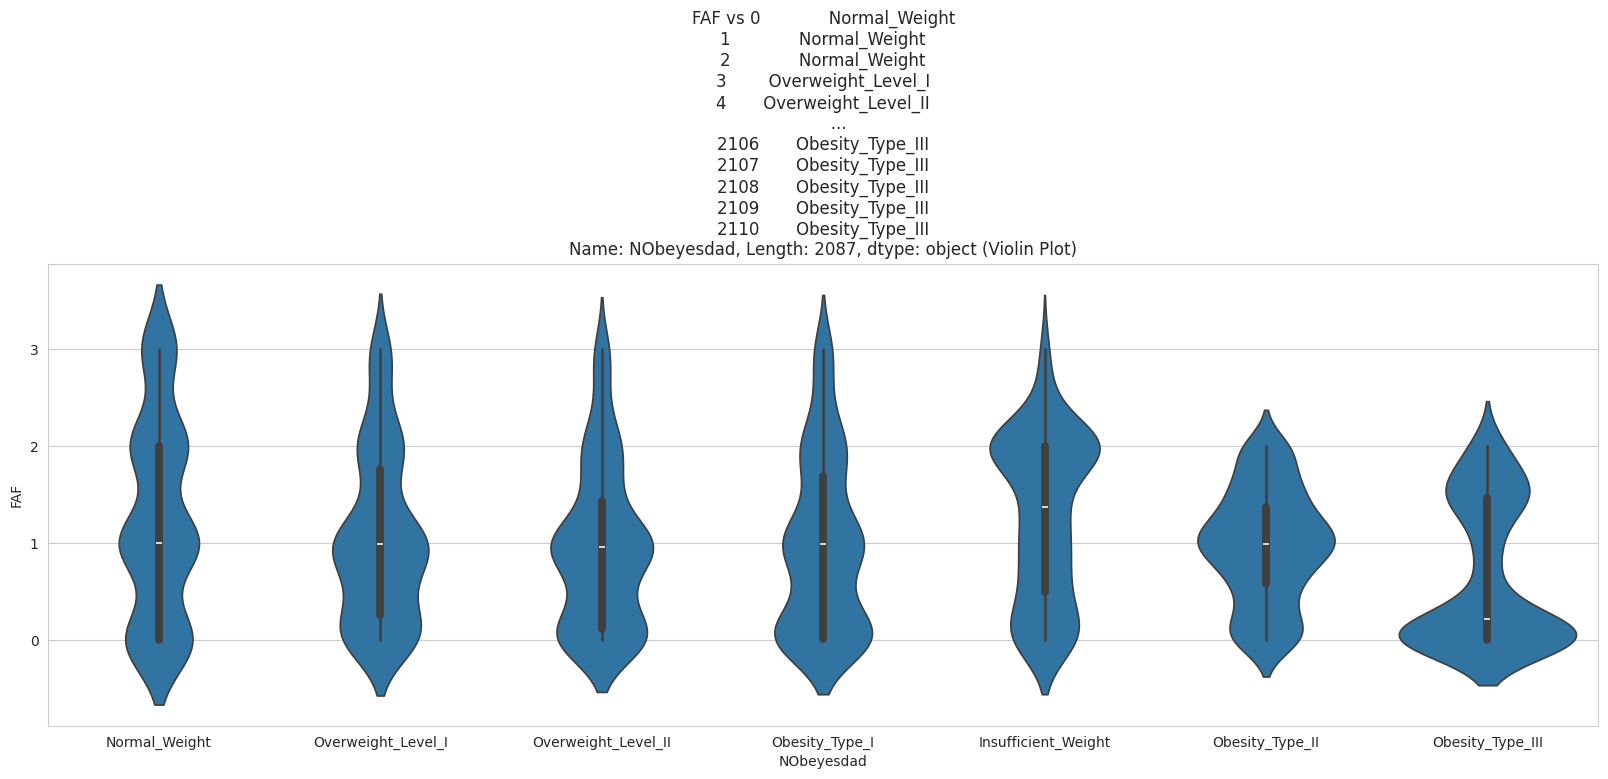

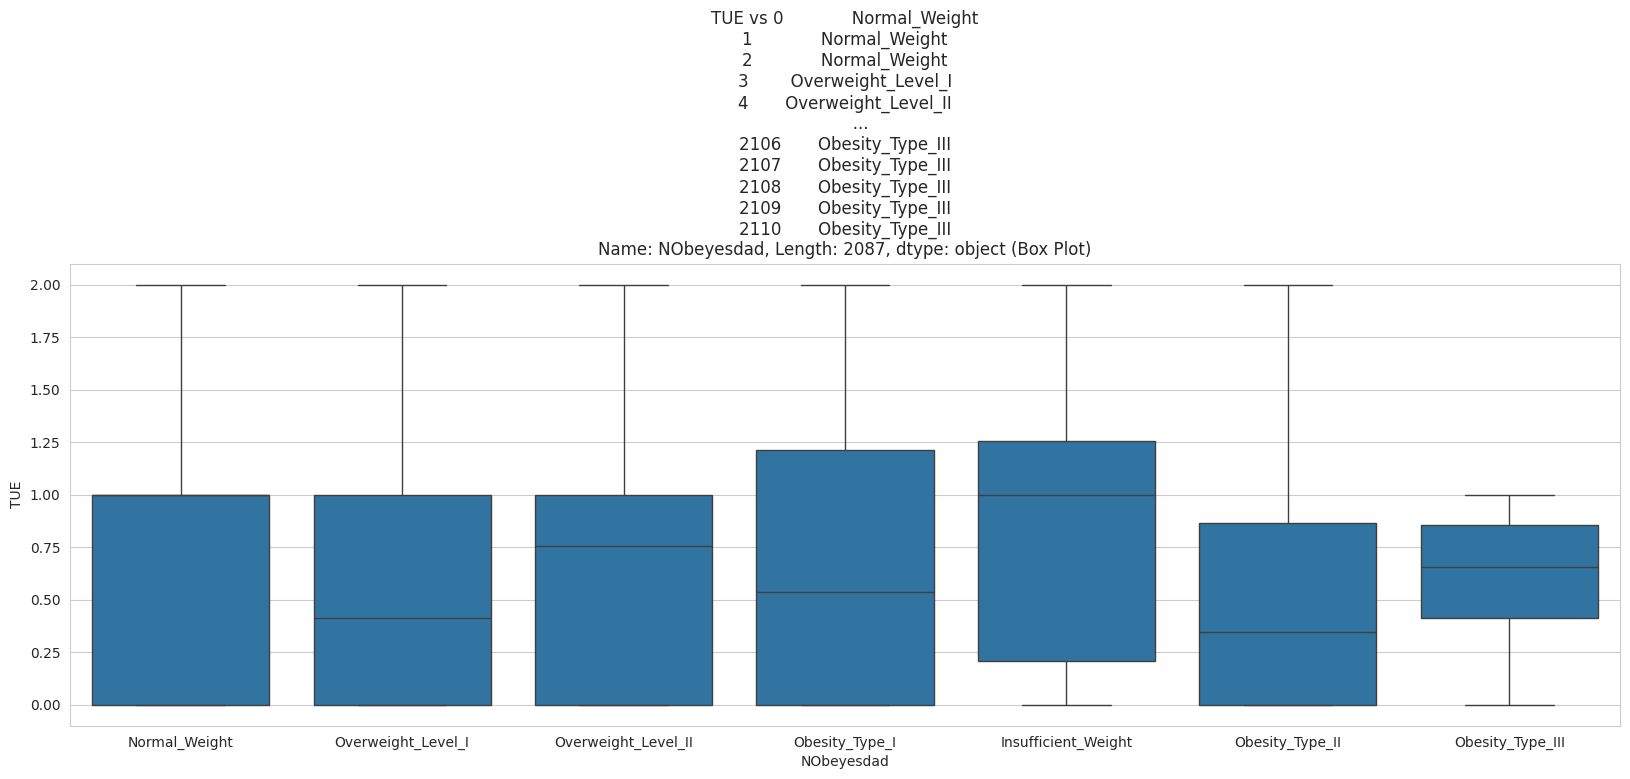

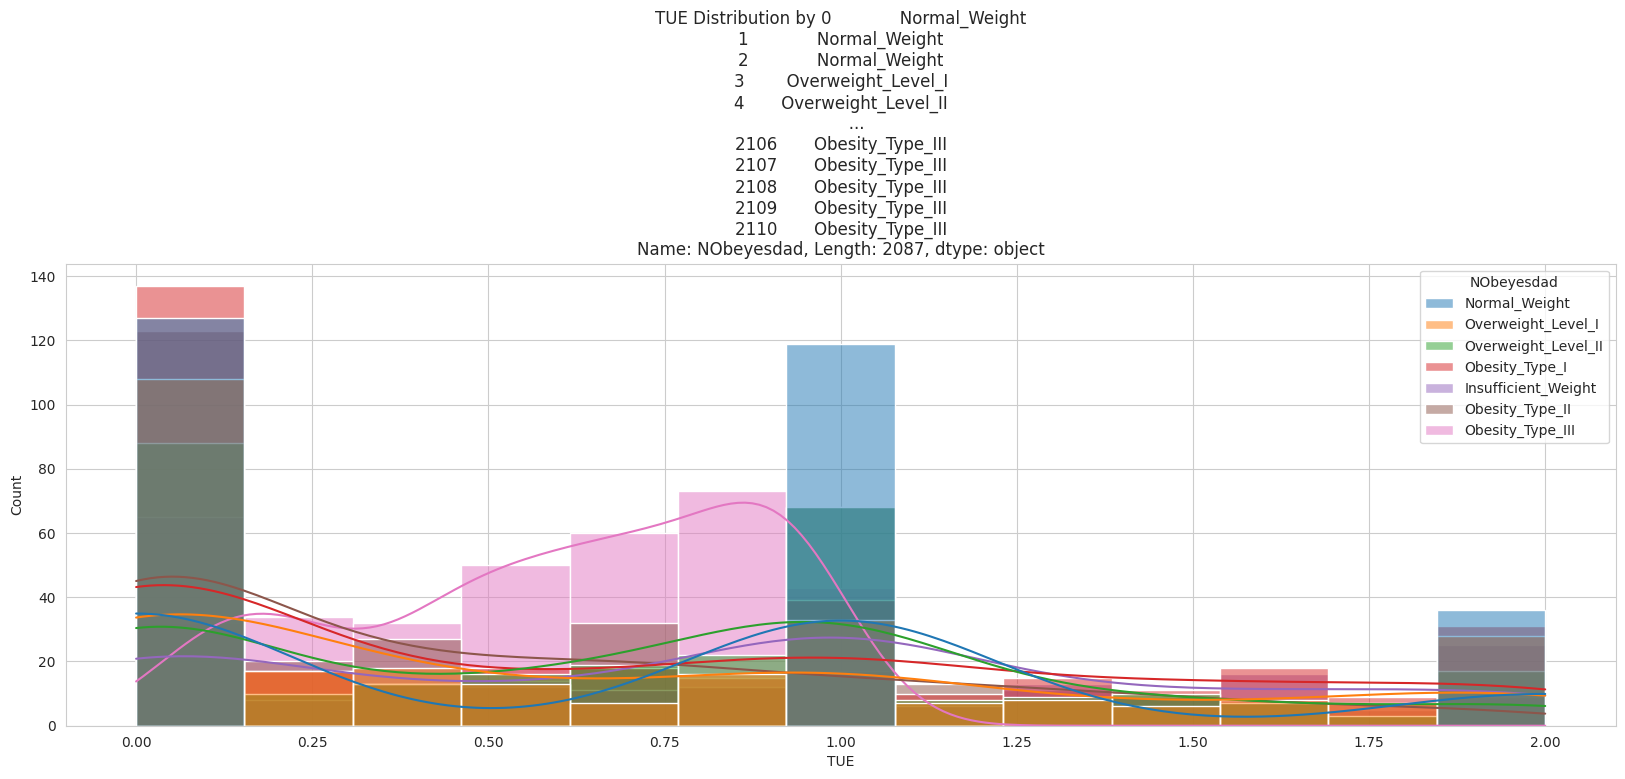

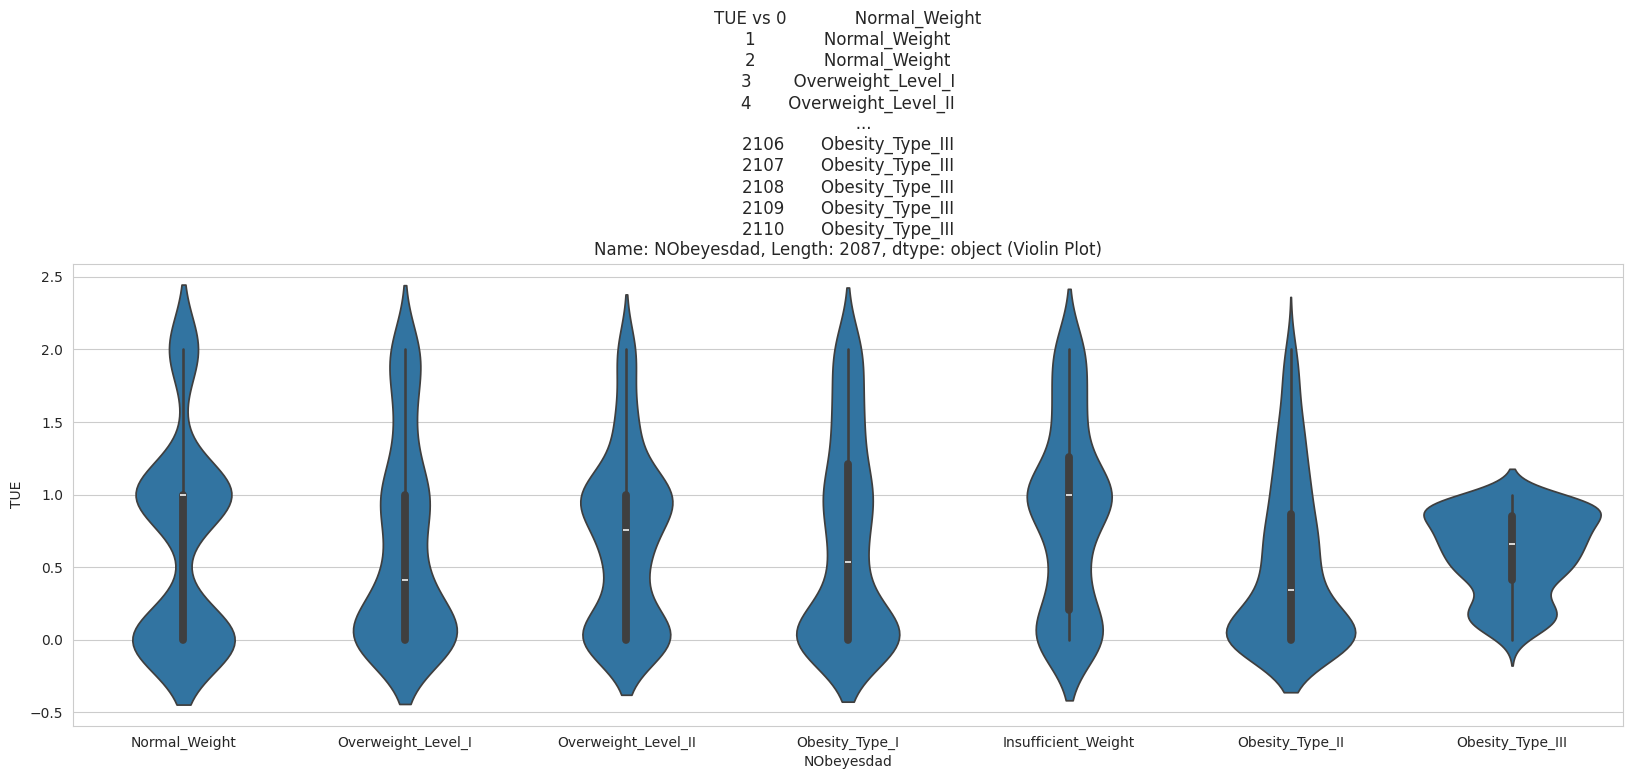

In [ ]:
numerical_features=dfnum.columns
target=df["NObeyesdad"]
for feature in numerical_features:
    # Box Plot
    plt.figure(figsize=(20, 6))
    sns.boxplot(x=target, y=feature, data=dfnum)
    plt.title(f'{feature} vs {target} (Box Plot)')
    plt.show()

    # Histogram or Density Plot
    plt.figure(figsize=(20, 6))
    sns.histplot(data=dfnum, x=feature, hue=target, kde=True)
    plt.title(f'{feature} Distribution by {target}')
    plt.show()

    # Violin Plot
    plt.figure(figsize=(20, 6))
    sns.violinplot(x=target, y=feature, data=dfnum)
    plt.title(f'{feature} vs {target} (Violin Plot)')
    plt.show()




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# Applyiing one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS'])

# Split data into features (X) and target variable (y)
X = df_encoded.drop(columns=['NObeyesdad'])
y = df_encoded['NObeyesdad']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8205741626794258


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load your dataset
# Assuming your DataFrame is named 'df'

# Data Preprocessing
# Encode the categorical target variable
#label_encoder = LabelEncoder()
#df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])


# Encode the target variable
label_encoder = LabelEncoder()

# Split data into features (X) and target variable (y)
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = label_encoder.fit_transform(y_train)
y_test= label_encoder.transform(y_test)

# Define the Neural Network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')  # 6 output neurons for 6 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Epoch 1/50
47/47 [==============================] - 4s 34ms/step - loss: 1.7935 - accuracy: 0.3009 - val_loss: 1.4230 - val_accuracy: 0.5329
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 1.3435 - accuracy: 0.5073 - val_loss: 1.0757 - val_accuracy: 0.5868
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 1.1385 - accuracy: 0.5672 - val_loss: 0.9105 - val_accuracy: 0.6766
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.9790 - accuracy: 0.6398 - val_loss: 0.8014 - val_accuracy: 0.7126
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.8846 - accuracy: 0.6791 - val_loss: 0.7310 - val_accuracy: 0.7365
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.8139 - accuracy: 0.6904 - val_loss: 0.6628 - val_accuracy: 0.7904
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.7511 - accuracy: 0.7197 - val_loss: 0.6226 - val_accuracy: 0.8024
Epoch 8/50
47/47 [=